# Machine Learning With Spark ML
In this lab assignment, you will complete a project by going through the following steps:
1. Get the data.
2. Discover the data to gain insights.
3. Prepare the data for Machine Learning algorithms.
4. Select a model and train it.
5. Fine-tune your model.
6. Present your solution.

As a dataset, we use the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. The dataset has the following columns
1. `longitude`: a measure of how far west a house is (a higher value is farther west)
2. `latitude`: a measure of how far north a house is (a higher value is farther north)
3. `housing_,median_age`: median age of a house within a block (a lower number is a newer building)
4. `total_rooms`: total number of rooms within a block
5. `total_bedrooms`: total number of bedrooms within a block
6. `population`: total number of people residing within a block
7. `households`: total number of households, a group of people residing within a home unit, for a block
8. `median_income`: median income for households within a block of houses
9. `median_house_value`: median house value for households within a block
10. `ocean_proximity`: location of the house w.r.t ocean/sea

---
# 1. Get the data
Let's start the lab by loading the dataset. The can find the dataset at `data/housing.csv`. To infer column types automatically, when you are reading the file, you need to set `inferSchema` to true. Moreover enable the `header` option to read the columns' name from the file.

In [150]:
// TODO: Replace <FILL IN> with appropriate code
val housing = spark.read
    .format("csv")
    .option("header", "true")
    .option("inferSchema", "true")
    .load("data/housing.csv")

housing = [longitude: double, latitude: double ... 8 more fields]


[longitude: double, latitude: double ... 8 more fields]

---
# 2. Discover the data to gain insights
Now it is time to take a look at the data. In this step we are going to take a look at the data a few different ways:
* See the schema and dimension of the dataset
* Look at the data itself
* Statistical summary of the attributes
* Breakdown of the data by the categorical attribute variable
* Find the correlation among different attributes
* Make new attributes by combining existing attributes

## 2.1. Schema and dimension
Print the schema of the dataset

In [9]:
// TODO: Replace <FILL IN> with appropriate code

housing.printSchema

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



Print the number of records in the dataset.

In [11]:
// TODO: Replace <FILL IN> with appropriate code

housing.count

20640

## 2.2. Look at the data
Print the first five records of the dataset.

In [12]:
// TODO: Replace <FILL IN> with appropriate code

housing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

Print the number of records with population more than 10000.

In [29]:
// TODO: Replace <FILL IN> with appropriate code
housing.where("population > 10000").count

23

## 2.3. Statistical summary
Print a summary of the table statistics for the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. You can use the `describe` command.

In [30]:
// TODO: Replace <FILL IN> with appropriate code

housing.describe("housing_median_age", "total_rooms", "median_house_value", "population").show

+-------+------------------+------------------+------------------+------------------+
|summary|housing_median_age|       total_rooms|median_house_value|        population|
+-------+------------------+------------------+------------------+------------------+
|  count|             20640|             20640|             20640|             20640|
|   mean|28.639486434108527|2635.7630813953488|206855.81690891474|1425.4767441860465|
| stddev| 12.58555761211163|2181.6152515827944|115395.61587441359|  1132.46212176534|
|    min|               1.0|               2.0|           14999.0|               3.0|
|    max|              52.0|           39320.0|          500001.0|           35682.0|
+-------+------------------+------------------+------------------+------------------+



Print the maximum age (`housing_median_age`), the minimum number of rooms (`total_rooms`), and the average of house values (`median_house_value`).

In [39]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.sql.functions._


println(housing.describe("housing_median_age").where("summary = 'max'").first()(1))
println(housing.describe("total_rooms").where("summary = 'min'").first()(1))
println(housing.describe("median_house_value").where("summary = 'mean'").first()(1))

52.0
2.0
206855.81690891474


## 2.4. Breakdown the data by categorical data
Print the number of houses in different areas (`ocean_proximity`), and sort them in descending order.

In [54]:
// TODO: Replace <FILL IN> with appropriate code
housing.groupBy("ocean_proximity").agg(count("population").alias("households")).sort($"households".desc).show

+---------------+----------+
|ocean_proximity|households|
+---------------+----------+
|      <1H OCEAN|      9136|
|         INLAND|      6551|
|     NEAR OCEAN|      2658|
|       NEAR BAY|      2290|
|         ISLAND|         5|
+---------------+----------+



Print the average value of the houses (`median_house_value`) in different areas (`ocean_proximity`), and call the new column `avg_value` when print it.

In [56]:
// TODO: Replace <FILL IN> with appropriate code

housing.groupBy("ocean_proximity").agg(mean("median_house_value").alias("avg_value")).show

+---------------+------------------+
|ocean_proximity|         avg_value|
+---------------+------------------+
|         ISLAND|          380440.0|
|     NEAR OCEAN|249433.97742663656|
|       NEAR BAY|259212.31179039303|
|      <1H OCEAN|240084.28546409807|
|         INLAND|124805.39200122119|
+---------------+------------------+



Rewrite the above question in SQL.

In [63]:
// TODO: Replace <FILL IN> with appropriate code

housing.createOrReplaceTempView("df")
spark.sql("select ocean_proximity, mean(median_house_value) as avg_value from df group by ocean_proximity").show()

+---------------+------------------+
|ocean_proximity|         avg_value|
+---------------+------------------+
|         ISLAND|          380440.0|
|     NEAR OCEAN|249433.97742663656|
|       NEAR BAY|259212.31179039303|
|      <1H OCEAN|240084.28546409807|
|         INLAND|124805.39200122119|
+---------------+------------------+



## 2.5. Correlation among attributes
Print the correlation among the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. To do so, first you need to put these attributes into one vector. Then, compute the standard correlation coefficient (Pearson) between every pair of attributes in this new vector. To make a vector of these attributes, you can use the `VectorAssembler` Transformer.

In [66]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.feature.VectorAssembler

val va = new VectorAssembler()
        .setInputCols(Array(
            "housing_median_age",
            "total_rooms",
            "median_house_value",
            "population")
        ).setOutputCol("features")

val housingAttrs = va.transform(housing)

housingAttrs.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|            features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|[41.0,880.0,45260...|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|[21.0,7099.0,3585...|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|[52.0,1467.0,3521...|
|  -122.25|   37.85|              52.0|     12

va = vecAssembler_ace5385160ac
housingAttrs = [longitude: double, latitude: double ... 9 more fields]


[longitude: double, latitude: double ... 9 more fields]

In [71]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.linalg.Matrix
import org.apache.spark.ml.stat.Correlation
import org.apache.spark.sql.Row

val Row(coeff: Matrix) = Correlation.corr(housingAttrs, "features").first()

println(s"The standard correlation coefficient:\n ${coeff}")

The standard correlation coefficient:
 1.0                   -0.36126220122231784  0.10562341249318154   -0.2962442397735293   
-0.36126220122231784  1.0                   0.13415311380654338   0.8571259728659772    
0.10562341249318154   0.13415311380654338   1.0                   -0.02464967888891235  
-0.2962442397735293   0.8571259728659772    -0.02464967888891235  1.0                   


coeff = 


1.0                   -0.36126220122231784  0.10562341249318154   -0.2962442397735293
-0.36126220122231784  1.0                   0.13415311380654338   0.8571259728659772
0.10562341249318154   0.13415311380654338   1.0                   -0.02464967888891235
-0.2962442397735293   0.8571259728659772    -0.02464967888891235  1.0


## 2.6. Combine and make new attributes
Now, let's try out various attribute combinations. In the given dataset, the total number of rooms in a block is not very useful, if we don't know how many households there are. What we really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful, and we want to compare it to the number of rooms. And the population per household seems like also an interesting attribute combination to look at. To do so, add the three new columns to the dataset as below. We will call the new dataset the `housingExtra`.
```
rooms_per_household = total_rooms / households
bedrooms_per_room = total_bedrooms / total_rooms
population_per_household = population / households
```

In [79]:
// TODO: Replace <FILL IN> with appropriate code

val housingCol1 = housing.withColumn("rooms_per_household", expr("total_rooms / households"))
val housingCol2 = housingCol1.withColumn("bedrooms_per_room", expr("total_bedrooms / total_rooms"))
val housingExtra = housingCol2.withColumn("population_per_household", expr("population / households"))

housingExtra.select("rooms_per_household", "bedrooms_per_room", "population_per_household").show(5)

+-------------------+-------------------+------------------------+
|rooms_per_household|  bedrooms_per_room|population_per_household|
+-------------------+-------------------+------------------------+
|  6.984126984126984|0.14659090909090908|      2.5555555555555554|
|  6.238137082601054|0.15579659106916466|       2.109841827768014|
|  8.288135593220339|0.12951601908657123|      2.8022598870056497|
| 5.8173515981735155|0.18445839874411302|       2.547945205479452|
|  6.281853281853282| 0.1720958819913952|      2.1814671814671813|
+-------------------+-------------------+------------------------+
only showing top 5 rows



housingCol1 = [longitude: double, latitude: double ... 9 more fields]
housingCol2 = [longitude: double, latitude: double ... 10 more fields]
housingExtra = [longitude: double, latitude: double ... 11 more fields]


[longitude: double, latitude: double ... 11 more fields]

---
## 3. Prepare the data for Machine Learning algorithms
Before going through the Machine Learning steps, let's first rename the label column from `median_house_value` to `label`.

In [82]:
// TODO: Replace <FILL IN> with appropriate code

val renamedHousing = housingExtra.withColumnRenamed("median_house_value", "label")

renamedHousing = [longitude: double, latitude: double ... 11 more fields]


[longitude: double, latitude: double ... 11 more fields]

Now, we want to separate the numerical attributes from the categorical attribute (`ocean_proximity`) and keep their column names in two different lists. Moreover, sice we don't want to apply the same transformations to the predictors (features) and the label, we should remove the label attribute from the list of predictors. 

In [85]:
// label columns
val colLabel = "label"

// categorical columns
val colCat = "ocean_proximity"

// numerical columns
val colNum = renamedHousing.columns.filter(_ != colLabel).filter(_ != colCat)

[Ljava.lang.String;@672fb8a5

colLabel = label
colCat = ocean_proximity
colNum = Array(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, bedrooms_per_room, population_per_household)


Array(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, bedrooms_per_room, population_per_household)

## 3.1. Prepare continuse attributes
### Data cleaning
Most Machine Learning algorithms cannot work with missing features, so we should take care of them. As a first step, let's find the columns with missing values in the numerical attributes. To do so, we can print the number of missing values of each continues attributes, listed in `colNum`.

In [94]:
// TODO: Replace <FILL IN> with appropriate code

for (c <- colNum) {
    println(c + ": " + renamedHousing.where(col(c).isNull).count)
}

longitude: 0
latitude: 0
housing_median_age: 0
total_rooms: 0
total_bedrooms: 207
population: 0
households: 0
median_income: 0
rooms_per_household: 0
bedrooms_per_room: 207
population_per_household: 0


lastException: Throwable = null


As we observerd above, the `total_bedrooms` and `bedrooms_per_room` attributes have some missing values. One way to take care of missing values is to use the `Imputer` Transformer, which completes missing values in a dataset, either using the mean or the median of the columns in which the missing values are located. To use it, you need to create an `Imputer` instance, specifying that you want to replace each attribute's missing values with the "median" of that attribute.

In [95]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.feature.Imputer

val imputer = new Imputer()
    .setStrategy("median")
    .setInputCols(Array("total_bedrooms", "bedrooms_per_room"))
    .setOutputCols(Array("total_bedrooms", "bedrooms_per_room"))
val imputedHousing = imputer.fit(renamedHousing).transform(renamedHousing)

imputedHousing.select("total_bedrooms", "bedrooms_per_room").show(5)
imputedHousing.show(1)

+--------------+-------------------+
|total_bedrooms|  bedrooms_per_room|
+--------------+-------------------+
|         129.0|0.14659090909090908|
|        1106.0|0.15579659106916466|
|         190.0|0.12951601908657123|
|         235.0|0.18445839874411302|
|         280.0| 0.1720958819913952|
+--------------+-------------------+
only showing top 5 rows

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|   label|ocean_proximity|rooms_per_household|  bedrooms_per_room|population_per_household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+
|  -122.23|   37.88|              41.0|      880.0|         129

imputer = imputer_8adecbe70c21
imputedHousing = [longitude: double, latitude: double ... 11 more fields]


[longitude: double, latitude: double ... 11 more fields]

### Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the label attribues is generally not required.

One way to get all attributes to have the same scale is to use standardization. In standardization, for each value, first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. To do this, we can use the `StandardScaler` Estimator. To use `StandardScaler`, again we need to convert all the numerical attributes into a big vectore of features using `VectorAssembler`, and then call `StandardScaler` on that vactor.

In [96]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.feature.{VectorAssembler, StandardScaler}

val va = new VectorAssembler()
    .setInputCols(colNum)
    .setOutputCol("unscaled")
val featuredHousing = va.transform(imputedHousing)

val scaler = new StandardScaler()
    .setInputCol("unscaled")
    .setOutputCol("scaled")
val scaledHousing = scaler.fit(featuredHousing).transform(featuredHousing)

scaledHousing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+--------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|   label|ocean_proximity|rooms_per_household|  bedrooms_per_room|population_per_household|            unscaled|              scaled|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+--------------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|452600.0|       NEAR BAY|  6.984126984126984|0.14659090909090908|      2.5555555555555554|[-122.23,37.88,41...|[-61.007269596069...|
|  -122.22|   37.86|              21.0|     7099.0|        1

va = vecAssembler_fcf4d1833158
featuredHousing = [longitude: double, latitude: double ... 12 more fields]
scaler = stdScal_63c3c32453e5
scaledHousing = [longitude: double, latitude: double ... 13 more fields]


[longitude: double, latitude: double ... 13 more fields]

## 3.2. Prepare categorical attributes
After imputing and scaling the continuse attributes, we should take care of the categorical attributes. Let's first print the number of distict values of the categirical attribute `ocean_proximity`.

In [98]:
// TODO: Replace <FILL IN> with appropriate code

renamedHousing.select(countDistinct(colCat)).show

+-------------------------------+
|count(DISTINCT ocean_proximity)|
+-------------------------------+
|                              5|
+-------------------------------+



### String indexer
Most Machine Learning algorithms prefer to work with numbers. So let's convert the categorical attribute `ocean_proximity` to numbers. To do so, we can use the `StringIndexer` that encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), ordered by label frequencies, so the most frequent label gets index 0.

In [100]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.feature.StringIndexer

val indexer = new StringIndexer()
    .setInputCol(colCat)
    .setOutputCol("ocean_proximity_transformed")
val idxHousing = indexer.fit(renamedHousing).transform(renamedHousing)

idxHousing.select("ocean_proximity_transformed").show(5)

+---------------------------+
|ocean_proximity_transformed|
+---------------------------+
|                        3.0|
|                        3.0|
|                        3.0|
|                        3.0|
|                        3.0|
+---------------------------+
only showing top 5 rows



indexer = strIdx_13564669f180
idxHousing = [longitude: double, latitude: double ... 12 more fields]


[longitude: double, latitude: double ... 12 more fields]

Now we can use this numerical data in any Machine Learning algorithm. You can look at the mapping that this encoder has learned using the `labels` method: "<1H OCEAN" is mapped to 0, "INLAND" is mapped to 1, etc.

In [101]:
indexer.fit(renamedHousing).labels

Array(<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND)

### One-hot encoding
Now, convert the label indices built in the last step into one-hot vectors. To do this, you can take advantage of the `OneHotEncoderEstimator` Estimator.

In [103]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.feature.OneHotEncoderEstimator

val encoder = new OneHotEncoderEstimator()
    .setInputCols(Array("ocean_proximity_transformed"))
    .setOutputCols(Array("ocean_proximity_onehot"))
val ohHousing = encoder.fit(idxHousing).transform(idxHousing)

ohHousing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+---------------------------+----------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|   label|ocean_proximity|rooms_per_household|  bedrooms_per_room|population_per_household|ocean_proximity_transformed|ocean_proximity_onehot|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+---------------------------+----------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|452600.0|       NEAR BAY|  6.984126984126984|0.14659090909090908|      2.5555555555555554|                        3.0|         (4,[3],[1.0])|
|  -122.22|   37.86|    

encoder = oneHotEncoder_7ef308f4828c
ohHousing = [longitude: double, latitude: double ... 13 more fields]


[longitude: double, latitude: double ... 13 more fields]

---
# 4. Pipeline
As you can see, there are many data transformation steps that need to be executed in the right order. For example, you called the `Imputer`, `VectorAssembler`, and `StandardScaler` from left to right. However, we can use the `Pipeline` class to define a sequence of Transformers/Estimators, and run them in order. A `Pipeline` is an `Estimator`, thus, after a Pipeline's `fit()` method runs, it produces a `PipelineModel`, which is a `Transformer`.

Now, let's create a pipeline called `numPipeline` to call the numerical transformers you built above (`imputer`, `va`, and `scaler`) in the right order from left to right, as well as a pipeline called `catPipeline` to call the categorical transformers (`indexer` and `encoder`). Then, put these two pipelines `numPipeline` and `catPipeline` into one pipeline.

In [105]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.{Pipeline, PipelineModel, PipelineStage}

val numPipeline = new Pipeline().setStages(Array(imputer, va, scaler))
val catPipeline = new Pipeline().setStages(Array(indexer, encoder))
val pipeline = new Pipeline().setStages(Array(numPipeline, catPipeline))
val newHousing = pipeline.fit(renamedHousing).transform(renamedHousing)

newHousing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+--------------------+--------------------+---------------------------+----------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|   label|ocean_proximity|rooms_per_household|  bedrooms_per_room|population_per_household|            unscaled|              scaled|ocean_proximity_transformed|ocean_proximity_onehot|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+--------------------+--------------------+---------------------------+----------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|452600.0|       NEAR BAY|  6.98412698412

numPipeline = pipeline_7db4facafaec
catPipeline = pipeline_d4a81245bf33
pipeline = pipeline_19508af7ca49
newHousing = [longitude: double, latitude: double ... 15 more fields]


[longitude: double, latitude: double ... 15 more fields]

Now, use `VectorAssembler` to put all attributes of the final dataset `newHousing` into a big vector, and call the new column `features`.

In [109]:
// TODO: Replace <FILL IN> with appropriate code

val va2 = new VectorAssembler()
    .setInputCols(Array("scaled", "ocean_proximity_onehot"))
    .setOutputCol("features")
val dataset = va2.transform(newHousing).select("features", "label")

dataset.show(5)

+--------------------+--------+
|            features|   label|
+--------------------+--------+
|[-61.007269596069...|452600.0|
|[-61.002278409814...|358500.0|
|[-61.012260782324...|352100.0|
|[-61.017251968579...|341300.0|
|[-61.017251968579...|342200.0|
+--------------------+--------+
only showing top 5 rows



va2 = vecAssembler_029ac76fcf26
dataset = [features: vector, label: double]


[features: vector, label: double]

---
# 5. Make a model
Here we going to make four different regression models:
* Linear regression model
* Decission tree regression
* Random forest regression
* Gradient-booster forest regression

But, before giving the data to train a Machine Learning model, let's first split the data into training dataset (`trainSet`) with 80% of the whole data, and test dataset (`testSet`) with 20% of it.

In [110]:
// TODO: Replace <FILL IN> with appropriate code

val Array(trainSet, testSet) = dataset.randomSplit(Array(0.8, 0.2))

trainSet = [features: vector, label: double]
testSet = [features: vector, label: double]


[features: vector, label: double]

## 5.1. Linear regression model
Now, train a Linear Regression model using the `LinearRegression` class. Then, print the coefficients and intercept of the model, as well as the summary of the model over the training set by calling the `summary` method.

In [115]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.regression.LinearRegression

// train the model
val lr = new LinearRegression()
val lrModel = lr.fit(trainSet)
val trainingSummary = lrModel.summary

println(s"Coefficients: ${lrModel.coefficients}, Intercept: ${lrModel.intercept}")
println(s"RMSE: ${trainingSummary.rootMeanSquaredError}")

Coefficients: [-55746.65430389134,-56324.445243188486,13348.78099940687,4247.796535050521,3747.7472303173304,-47733.199331865726,44301.62784828421,78008.87551559761,6866.070457139962,15090.97837444806,3251.9765798856865,-154470.175278361,-188977.5779513645,-149308.23640046915,-159459.16698206638], Intercept: -2284165.9355189544
RMSE: 67401.5722054515


lr = linReg_a2cb28615f0b
lrModel = linReg_a2cb28615f0b
trainingSummary = org.apache.spark.ml.regression.LinearRegressionTrainingSummary@60133da7


org.apache.spark.ml.regression.LinearRegressionTrainingSummary@60133da7

Now, use `RegressionEvaluator` to measure the root-mean-square-erroe (RMSE) of the model on the test dataset.

In [117]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.evaluation.RegressionEvaluator

// make predictions on the test data
val predictions = lrModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

// select (prediction, true label) and compute test error.
val evaluator = new RegressionEvaluator()
    .setLabelCol("label")
    .setPredictionCol("prediction")
    .setMetricName("rmse")
val rmse = evaluator.evaluate(predictions)
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

+------------------+--------+--------------------+
|        prediction|   label|            features|
+------------------+--------+--------------------+
|179283.31310757156| 79000.0|[-62.025471592109...|
|183664.86150777526| 76100.0|[-62.015489219599...|
| 208879.8786575799|106700.0|[-62.005506847089...|
|155684.74660526495| 72200.0|[-61.980550915813...|
| 226716.5494779935|116100.0|[-61.975559729558...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 69995.55885784679


predictions = [features: vector, label: double ... 1 more field]
evaluator = regEval_3c7d13028323
rmse = 69995.55885784679


69995.55885784679

## 5.2. Decision tree regression
Repeat what you have done on Regression Model to build a Decision Tree model. Use the `DecisionTreeRegressor` to make a model and then measure its RMSE on the test dataset.

In [118]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.regression.DecisionTreeRegressor
import org.apache.spark.ml.evaluation.RegressionEvaluator

val dt = new DecisionTreeRegressor().setLabelCol("label").setFeaturesCol("features")

// train the model
val dtModel = dt.fit(trainSet)

// make predictions on the test data
val predictions = dtModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

// select (prediction, true label) and compute test error
val evaluator = new RegressionEvaluator()
    .setLabelCol("label")
    .setPredictionCol("prediction")
    .setMetricName("rmse")
val rmse = evaluator.evaluate(predictions)
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

+------------------+--------+--------------------+
|        prediction|   label|            features|
+------------------+--------+--------------------+
| 164952.8974507532| 79000.0|[-62.025471592109...|
| 152071.8875502008| 76100.0|[-62.015489219599...|
| 164952.8974507532|106700.0|[-62.005506847089...|
| 164952.8974507532| 72200.0|[-61.980550915813...|
|228076.28225806452|116100.0|[-61.975559729558...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 69127.3016048634


dt = dtr_14a4b9f0e68d
dtModel = DecisionTreeRegressionModel (uid=dtr_14a4b9f0e68d) of depth 5 with 63 nodes
predictions = [features: vector, label: double ... 1 more field]
evaluator = regEval_cc126b825ea6
rmse = 69127.3016048634


69127.3016048634

## 5.3. Random forest regression
Let's try the test error on a Random Forest Model. Youcan use the `RandomForestRegressor` to make a Random Forest model.

In [119]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.regression.RandomForestRegressor
import org.apache.spark.ml.evaluation.RegressionEvaluator

val rf = new RandomForestRegressor().setLabelCol("label").setFeaturesCol("features")

// train the model
val rfModel = rf.fit(trainSet)

// make predictions on the test data
val predictions = rfModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

// select (prediction, true label) and compute test error
val evaluator = new RegressionEvaluator()
    .setLabelCol("label")
    .setPredictionCol("prediction")
    .setMetricName("rmse")
val rmse = evaluator.evaluate(predictions)
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

+------------------+--------+--------------------+
|        prediction|   label|            features|
+------------------+--------+--------------------+
|151387.12226148503| 79000.0|[-62.025471592109...|
| 175313.6908800409| 76100.0|[-62.015489219599...|
|189926.39348163913|106700.0|[-62.005506847089...|
|140975.72073336694| 72200.0|[-61.980550915813...|
| 235067.9026520523|116100.0|[-61.975559729558...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 67193.68791777136


rf = rfr_e164e0fe9f57
rfModel = RandomForestRegressionModel (uid=rfr_e164e0fe9f57) with 20 trees
predictions = [features: vector, label: double ... 1 more field]
evaluator = regEval_4ec898a026d3
rmse = 67193.68791777136


67193.68791777136

## 5.4. Gradient-boosted tree regression
Fianlly, we want to build a Gradient-boosted Tree Regression model and test the RMSE of the test data. Use the `GBTRegressor` to build the model.

In [120]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.regression.GBTRegressor
import org.apache.spark.ml.evaluation.RegressionEvaluator

val gb = new GBTRegressor().setLabelCol("label").setFeaturesCol("features")

// train the model
val gbModel = gb.fit(trainSet)

// make predictions on the test data
val predictions = gbModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

// select (prediction, true label) and compute test error
val evaluator = new RegressionEvaluator()
    .setLabelCol("label")
    .setPredictionCol("prediction")
    .setMetricName("rmse")
val rmse = evaluator.evaluate(predictions)
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

+------------------+--------+--------------------+
|        prediction|   label|            features|
+------------------+--------+--------------------+
|108750.08896614036| 79000.0|[-62.025471592109...|
| 81533.04665842053| 76100.0|[-62.015489219599...|
|108794.65855724327|106700.0|[-62.005506847089...|
|105066.14397667177| 72200.0|[-61.980550915813...|
|148471.66738659985|116100.0|[-61.975559729558...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 56492.13106526796


gb = gbtr_aebbcc6c3f44
gbModel = GBTRegressionModel (uid=gbtr_aebbcc6c3f44) with 20 trees
predictions = [features: vector, label: double ... 1 more field]
evaluator = regEval_9e9febdc75de
rmse = 56492.13106526796


56492.13106526796

---
# 6. Hyperparameter tuning
An important task in Machie Learning is model selection, or using data to find the best model or parameters for a given task. This is also called tuning. Tuning may be done for individual Estimators such as LinearRegression, or for entire Pipelines which include multiple algorithms, featurization, and other steps. Users can tune an entire Pipeline at once, rather than tuning each element in the Pipeline separately. MLlib supports model selection tools, such as `CrossValidator`. These tools require the following items:
* Estimator: algorithm or Pipeline to tune (`setEstimator`)
* Set of ParamMaps: parameters to choose from, sometimes called a "parameter grid" to search over (`setEstimatorParamMaps`)
* Evaluator: metric to measure how well a fitted Model does on held-out test data (`setEvaluator`)

`CrossValidator` begins by splitting the dataset into a set of folds, which are used as separate training and test datasets. For example with `k=3` folds, `CrossValidator` will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing. To evaluate a particular `ParamMap`, `CrossValidator` computes the average evaluation metric for the 3 Models produced by fitting the Estimator on the 3 different (training, test) dataset pairs. After identifying the best `ParamMap`, `CrossValidator` finally re-fits the Estimator using the best ParamMap and the entire dataset.

Below, use the `CrossValidator` to select the best Random Forest model. To do so, you need to define a grid of parameters. Let's say we want to do the search among the different number of trees (1, 5, and 10), and different tree depth (5, 10, and 15).

In [122]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.tuning.ParamGridBuilder
import org.apache.spark.ml.evaluation.RegressionEvaluator
import org.apache.spark.ml.tuning.CrossValidator

val paramGrid = new ParamGridBuilder()
  .addGrid(rf.numTrees, Array(1, 5, 10))
  .addGrid(rf.maxDepth, Array(5, 10, 15))
  .build()

val evaluator = new RegressionEvaluator().setLabelCol("label").setPredictionCol("prediction").setMetricName("rmse")
val cv = new CrossValidator()
  .setEstimator(rf)
  .setEvaluator(evaluator)
  .setEstimatorParamMaps(paramGrid)
  .setNumFolds(3)
  .setParallelism(2)
val cvModel = cv.fit(trainSet)

val predictions = cvModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

val rmse = evaluator.evaluate(predictions)
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

+------------------+--------+--------------------+
|        prediction|   label|            features|
+------------------+--------+--------------------+
|121266.29313725489| 79000.0|[-62.025471592109...|
|           98362.5| 76100.0|[-62.015489219599...|
| 143203.3333333333|106700.0|[-62.005506847089...|
| 81172.66666666667| 72200.0|[-61.980550915813...|
|200570.75471698114|116100.0|[-61.975559729558...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 53898.25923555624


paramGrid = 


Array({
	rfr_e164e0fe9f57-maxDepth: 5,
	rfr_e164e0fe9f57-numTrees: 1
}, {
	rfr_e164e0fe9f57-maxDepth: 5,
	rfr_e164e0fe9f57-numTrees: 5
}, {
	rfr_e164e0fe9f57-maxDepth: 5,
	rfr_e164e0fe9f57-numTrees: 10
}, {
	rfr_e164e0fe9f57-maxDepth: 10,
	rfr_e164e0fe9f57-numTrees: 1
}, {
	rfr_e164e0fe9f57-maxDepth: 10,
	rfr_e164e0fe9f57-numTrees: 5
}, {
	rfr_e164e0fe9f57-maxDepth: 10,
	rfr_e164e0fe9f57-numTrees: 10
}, {
	rfr_e164e0fe9f57-maxDepth: 15,
	rfr_e164e0fe9f57-numTrees: 1
}, {
	rfr_e164e0fe9f57-maxDepth: 15,
	rfr_e164e0fe9f57-numTrees: 5
}, {
	rfr_e164e0fe9f57-maxDepth: 15,
	rfr_e164...


---
# 7. Custom transformer
At the end of part two, we added extra columns to the `housing` dataset. Here, we are going to implement a Transformer to do the same task. The Transformer should take the name of two input columns `inputCol1` and `inputCol2`, as well as the name of ouput column `outputCol`. It, then, computes `inputCol1` divided by `inputCol2`, and adds its result as a new column to the dataset. The details of the implemeting a custom Tranfomer is explained [here](https://www.oreilly.com/learning/extend-spark-ml-for-your-own-modeltransformer-types). Please read it before before starting to implement it.

First, define the given parameters of the Transformer and implement a method to validate their schemas (`StructType`).

In [147]:
import org.apache.spark.sql.types.{StructField, StructType, DoubleType}
import org.apache.spark.ml.param.{ParamMap, Param, Params}
import org.apache.spark.ml.util.SchemaUtils

trait MyParams extends Params {
    final val inputCol1 = new Param[String](this, "inputCol1", "The first input column")
    final val inputCol2 = new Param[String](this, "inputCol2", "The second input column")
    final val outputCol = new Param[String](this, "outputCol", "The output column")
    
  protected def validateAndTransformSchema(schema: StructType): StructType = {
    val field1 = schema.fields(schema.fieldIndex("inputCol1"))
    val field2 = schema.fields(schema.fieldIndex("inputCol2"))
    if (field1.dataType != StructType) {
        throw new Exception(s"Input 1 type ${field1.dataType} did not match input type StructType")
    }
    if (field2.dataType != StructType) {
        throw new Exception(s"Input 2 type ${field2.dataType} did not match input type StructType")
    }
    // Add the return field
    schema.add(StructField(get(outputCol).getOrElse("outputCol"), DoubleType, false))  
  }
}


defined trait MyParams


Then, extend the class `Transformer`, and implement its setter functions for the input and output columns, and call then `setInputCol1`, `setInputCol2`, and `setOutputCol`. Morever, you need to override the methods `copy`, `transformSchema`, and the `transform`. The details of what you need to cover in these methods is given [here](https://www.oreilly.com/learning/extend-spark-ml-for-your-own-modeltransformer-types).

In [148]:
import org.apache.spark.ml.util.Identifiable
import org.apache.spark.ml.Transformer
import org.apache.spark.ml.param.{ParamMap, Param, Params}
import org.apache.spark.sql.{DataFrame, Dataset}
import org.apache.spark.sql.types.StructType
import org.apache.spark.sql.functions.{col, udf}

class MyTransformer(override val uid: String) extends Transformer with MyParams {
    def this() = this(Identifiable.randomUID("configurablewordcount"))
    
    def setInputCol1(value: String): this.type = set(inputCol1, value)
    
    def setInputCol2(value: String): this.type = set(inputCol2, value)
    
    def setOutputCol(value: String): this.type = set(outputCol, value)

    override def copy(extra: ParamMap): MyTransformer = defaultCopy(extra)

    override def transformSchema(schema: StructType): StructType = validateAndTransformSchema(schema)
    
    override def transform(df: Dataset[_]): DataFrame = {
        df.select(col("*"), (df.col($(inputCol1)) / df.col($(inputCol2))).as($(outputCol)))
    }
}

defined class MyTransformer


Now, an instance of `MyTransformer`, and set the input columns `total_rooms` and `households`, and the output column `rooms_per_household` and run it over the `housing` dataset.

In [151]:
val myTransformer = new MyTransformer().setInputCol1("total_rooms").setInputCol2("households").setOutputCol("rooms_per_household")

val myDataset = myTransformer.transform(housing).select("rooms_per_household").show(5)

+-------------------+
|rooms_per_household|
+-------------------+
|  6.984126984126984|
|  6.238137082601054|
|  8.288135593220339|
| 5.8173515981735155|
|  6.281853281853282|
+-------------------+
only showing top 5 rows



myTransformer = configurablewordcount_83f5245272c3


myDataset: Unit = ()


configurablewordcount_83f5245272c3

---
# 8. Custom estimator (predictor)
Now, it's time to implement your own linear regression with gradient descent algorithm as a brand new Estimator. The whole code of the Estimator is given to you, and you do not need to implement anything. It is just a sample that shows how to build a custom Estimator.

The gradient descent update for linear regression is:
$$
w_{i+1} = w_{i} - \alpha_{i} \sum\limits_{j=1}^n (w_i^\top x_j - y_j)x_j
$$

where $i$ is the iteration number of the gradient descent algorithm, and $j$ identifies the observation. Here, $w$ represents an array of weights that is the same size as the array of features and provides a weight for each of the features when finally computing the label prediction in the form:

$$
prediction = w^\top \cdot\ x
$$

where $w$ is the final array of weights computed by the gradient descent, $x$ is the array of features of the observation point and $prediction$ is the label we predict should be associated to this observation.

The given `Helper` class implements the helper methods:
* `dot`: implements the dot product of two vectors and the dot product of a vector and a scalar
* `sum`: implements addition of two vectors
* `fill`: creates a vector of predefined size and initialize it with the predefined value

What you need to do is to implement the methods of the Linear Regresstion class `LR`, which are
* `rmsd`: computes the Root Mean Square Error of a given RDD of tuples of (label, prediction) using the formula:
$$
rmse = \sqrt{\frac{\sum\limits_{i=1}^n (label - prediction)^2}{n}}
$$
* `gradientSummand`: computes the following formula:
$$
gs_{ij} = (w_i^\top x_j - y_j)x_j
$$
* `gradient`: computes the following formula:
$$
gradient = \sum\limits_{j=1}^n gs_{ij}
$$

In [143]:
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictorParams
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.util._
import org.apache.spark.rdd.RDD
import org.apache.spark.sql.Dataset
import org.apache.spark.sql.functions._
import org.apache.spark.sql.Row
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.Matrices
import org.apache.spark.mllib.evaluation.RegressionMetrics
import org.apache.spark.ml.{PredictionModel, Predictor}

case class Instance(label: Double, features: Vector)

object Helper extends Serializable {
  def dot(v1: Vector, v2: Vector): Double = {
    val m = Matrices.dense(1, v1.size, v1.toArray)
    m.multiply(v2).values(0)
  }

  def dot(v: Vector, s: Double): Vector = {
    val baseArray = v.toArray.map(vi => vi * s)
    Vectors.dense(baseArray)
  }

  def sumVectors(v1: Vector, v2: Vector): Vector = {
    val baseArray = ((v1.toArray) zip (v2.toArray)).map { case (val1, val2) => val1 + val2 }
    Vectors.dense(baseArray)
  }

  def fillVector(size: Int, fillVal: Double): Vector = Vectors.dense(Array.fill[Double](size)(fillVal));
}

defined class Instance
defined object Helper


In [148]:
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictorParams
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.util._
import org.apache.spark.rdd.RDD
import org.apache.spark.sql.Dataset
import org.apache.spark.sql.functions._

import org.apache.spark.sql.Row
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.Matrices
import org.apache.spark.mllib.evaluation.RegressionMetrics
import org.apache.spark.ml.{PredictionModel, Predictor}

class LR() extends Serializable {
  def calcRMSE(labelsAndPreds: RDD[(Double, Double)]): Double = {
    val regressionMetrics = new RegressionMetrics(labelsAndPreds)
    regressionMetrics.rootMeanSquaredError
  }
  
  def gradientSummand(weights: Vector, lp: Instance): Vector = {
    val mult = (Helper.dot(weights, lp.features) - lp.label)
    val seq = (0 to lp.features.size - 1).map(i => lp.features(i) * mult)
    return Vectors.dense(seq.toArray)
  }
  
  def linregGradientDescent(trainData: RDD[Instance], numIters: Int): (Vector, Array[Double]) = {
    val n = trainData.count()
    val d = trainData.take(1)(0).features.size
    var w = Helper.fillVector(d, 0)
    val alpha = 1.0
    val errorTrain = Array.fill[Double](numIters)(0.0)

    for (i <- 0 until numIters) {
      val labelsAndPredsTrain = trainData.map(lp => (lp.label, Helper.dot(w, lp.features)))
      errorTrain(i) = calcRMSE(labelsAndPredsTrain)

      val gradient = trainData.map(lp => gradientSummand(w, lp)).reduce((v1, v2) => Helper.sumVectors(v1, v2))
      val alpha_i = alpha / (n * scala.math.sqrt(i + 1))
      val wAux = Helper.dot(gradient, (-1) * alpha_i)
      w = Helper.sumVectors(w, wAux)
    }
    (w, errorTrain)
  }
}

defined class LR


In [152]:
import org.apache.spark.ml.PredictionModel
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.param.ParamMap

abstract class MyLinearModel[FeaturesType, Model <: MyLinearModel[FeaturesType, Model]]
  extends PredictionModel[FeaturesType, Model] {}

class MyLinearModelImpl(override val uid: String, val weights: Vector, val trainingError: Array[Double])
    extends MyLinearModel[Vector, MyLinearModelImpl] {

  override def copy(extra: ParamMap): MyLinearModelImpl = defaultCopy(extra)

  def predict(features: Vector): Double = {
    println("Predicting")
    val prediction = Helper.dot(weights, features)
    prediction
  }
}

defined class MyLinearModel
defined class MyLinearModelImpl


In [154]:
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictorParams
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.util._
import org.apache.spark.rdd.RDD
import org.apache.spark.sql.Dataset
import org.apache.spark.sql.functions._

import org.apache.spark.sql.Row
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.Matrices
import org.apache.spark.mllib.evaluation.RegressionMetrics
import org.apache.spark.ml.{PredictionModel, Predictor}

abstract class MyLinearRegression[
    FeaturesType,
    Learner <: MyLinearRegression[FeaturesType, Learner, Model],
    Model <: MyLinearModel[FeaturesType, Model]]
  extends Predictor[FeaturesType, Learner, Model] {
}

class MyLinearRegressionImpl(override val uid: String)
    extends MyLinearRegression[Vector, MyLinearRegressionImpl, MyLinearModelImpl] {
  def this() = this(Identifiable.randomUID("linReg"))

  override def copy(extra: ParamMap): MyLinearRegressionImpl = defaultCopy(extra)
  
  def train(dataset: Dataset[_]): MyLinearModelImpl = {
    println("Training")

    val numIters = 10

    val instances: RDD[Instance] = dataset.select(
      col($(labelCol)), col($(featuresCol))).rdd.map {
        case Row(label: Double, features: Vector) =>
          Instance(label, features)
      }

    val (weights, trainingError) = new LR().linregGradientDescent(instances, numIters)

    new MyLinearModelImpl(uid, weights, trainingError)
  }
}

defined class MyLinearRegression
defined class MyLinearRegressionImpl


In [155]:
import org.apache.spark.ml.evaluation.RegressionEvaluator

val lr = new MyLinearRegressionImpl().setLabelCol("label").setFeaturesCol("features")
val model = lr.fit(trainSet)
val predictions = model.transform(trainSet)
predictions.select("prediction", "label", "features").show(5)

// Select (prediction, true label) and compute test error.
val evaluator = new RegressionEvaluator().setLabelCol("label").setPredictionCol("prediction").setMetricName("rmse")
val rmse = evaluator.evaluate(predictions)
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

Training
+--------------------+--------+--------------------+
|          prediction|   label|            features|
+--------------------+--------+--------------------+
|-8.63958791352960...| 94600.0|[-62.065401082150...|
|-8.65113255028910...| 85800.0|[-62.040445150874...|
|-8.65241876503647...|103600.0|[-62.040445150874...|
|-8.63542019301456...|111400.0|[-62.020480405854...|
|-8.63710462663920...| 50800.0|[-62.005506847089...|
+--------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 8.259665058659588E37


lr = linReg_af54a34cce74
model = linReg_af54a34cce74
predictions = [features: vector, label: double ... 1 more field]
evaluator = regEval_5b33d7cda065
rmse = 8.259665058659588E37


8.259665058659588E37

---
# 9. An End-to-End Classification Test
As the last step, you are given a dataset called `data/ccdefault.csv`. The dataset represents default of credit card clients. It has 30,000 cases and 24 different attributes. More details about the dataset is available at `data/ccdefault.txt`. In this task you should make three models, compare their results and conclude the ideal solution. Here are the suggested steps:
1. Load the data.
2. Carry out some exploratory analyses (e.g., how various features and the target variable are distributed).
3. Train a model to predict the target variable (risk of `default`).
  - Employ three different models (logistic regression, decision tree, and random forest).
  - Compare the models' performances (e.g., AUC).
  - Defend your choice of best model (e.g., what are the strength and weaknesses of each of these models?).
4. What more would you do with this data? Anything to help you devise a better solution?

In [1]:
val defaults = spark.read
    .format("csv")
    .option("header", "true")
    .option("inferSchema", "true")
    .load("data/ccdefault.csv")

defaults = [ID: int, LIMIT_BAL: int ... 23 more fields]


[ID: int, LIMIT_BAL: int ... 23 more fields]

(0.2221112221112221,0.0)
(1.0,0.0)
(0.0,0.0)
(1.0,1.0)
(0.0,0.0)
(1.0,1.0)
(0.9516856345286665,0.6268436578171092)
(0.999785269486794,0.9992625368731564)
(1.0,1.0)
(0.0,0.0)
(1.0,1.0)
(6.441915396177797E-4,0.0022123893805309734)
(0.0012883830792355595,0.003687315634218289)
(0.9078806098346575,0.5405604719764012)
(0.9201202490873953,0.5582595870206489)
(0.920979171140219,0.5612094395280236)
(0.9235559372986901,0.5685840707964602)
(0.9516856345286665,0.6268436578171092)
(0.9525445565814902,0.6305309734513275)
(0.9602748550569036,0.6519174041297935)
(0.961992699162551,0.6563421828908554)
(0.9669315009662873,0.6851032448377581)
(0.968005153532317,0.6910029498525073)
(0.9901223963925274,0.8724188790560472)
(0.999785269486794,0.9992625368731564)
(1.0,1.0)


## View the data

Let's begin with some initial viewing of the structure of the data.

In [2]:
defaults.printSchema
defaults.count

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- DEFAULT: integer (nullable = tru

30000

In [3]:
import org.apache.spark.sql.functions._
import org.apache.spark.ml.feature.{VectorAssembler, StandardScaler}
import org.apache.spark.ml.linalg.Matrix
import org.apache.spark.ml.stat.Correlation
import org.apache.spark.sql.Row
import org.apache.spark.ml.feature.Imputer
import org.apache.spark.ml.{Pipeline, PipelineModel, PipelineStage}
import org.apache.spark.ml.regression.LinearRegression
import org.apache.spark.ml.feature.OneHotEncoderEstimator

In [4]:
defaults.show(1)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|DEFAULT|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|      1|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+----

## Categorical Data

Let's look at the different categorical values. One strange initial fact is the extra values in column `EDUCATION` and `MARRIAGE`.

`EDUCATION` should only have the following values:

| Value | Description |
| --- | --- |
| 1 | Graduate school |
| 2 | University |
| 3 | High School |
| 4 | Others |

... but has the values `[0, 1, 2, 3, 4, 5, 6]`.

`MARRIAGE` should only have the following values:

| Value | Description |
| --- | --- |
| 1 | Married |
| 2 | Single |
| 3 | Others |

... but has the values `[0, 1, 2, 3]`.

We suspect that this is a miss in how the data is explained in `data/ccdefault.txt`. As we are only interested in calculating the risk of default, and not in the specific attributes, we will ignore the differences here and assume that it will contribute with more information for the model.

In [5]:
defaults.groupBy("SEX").count().orderBy("SEX").show()
defaults.groupBy("EDUCATION").count().orderBy("EDUCATION").show()
defaults.groupBy("MARRIAGE").count().orderBy("MARRIAGE").show()
defaults.groupBy("AGE").count().orderBy("AGE").show()
defaults.groupBy("DEFAULT").count().orderBy("DEFAULT").show()

+---+-----+
|SEX|count|
+---+-----+
|  1|11888|
|  2|18112|
+---+-----+

+---------+-----+
|EDUCATION|count|
+---------+-----+
|        0|   14|
|        1|10585|
|        2|14030|
|        3| 4917|
|        4|  123|
|        5|  280|
|        6|   51|
+---------+-----+

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|       0|   54|
|       1|13659|
|       2|15964|
|       3|  323|
+--------+-----+

+---+-----+
|AGE|count|
+---+-----+
| 21|   67|
| 22|  560|
| 23|  931|
| 24| 1127|
| 25| 1186|
| 26| 1256|
| 27| 1477|
| 28| 1409|
| 29| 1605|
| 30| 1395|
| 31| 1217|
| 32| 1158|
| 33| 1146|
| 34| 1162|
| 35| 1113|
| 36| 1108|
| 37| 1041|
| 38|  944|
| 39|  954|
| 40|  870|
+---+-----+
only showing top 20 rows

+-------+-----+
|DEFAULT|count|
+-------+-----+
|      0|23364|
|      1| 6636|
+-------+-----+



In [6]:
// label columns
val colLabel = "DEFAULT"

// categorical columns
val colCat = Array("EDUCATION", "MARRIAGE")
val drop = Array("ID")

// numerical columns
val colNum = defaults.columns
    .filter(_ != colLabel)
    .filter(!colCat.contains(_))
    .filter(!drop.contains(_))

colLabel = DEFAULT
colCat = Array(EDUCATION, MARRIAGE)
drop = Array(ID)
colNum = Array(LIMIT_BAL, SEX, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6)


Array(LIMIT_BAL, SEX, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6)

In [38]:
for (c <- defaults.columns) {
    println(c + ": " + defaults.where(col(c).isNull).count)
}

ID: 0
LIMIT_BAL: 0
SEX: 0
EDUCATION: 0
MARRIAGE: 0
AGE: 0
PAY_0: 0
PAY_2: 0
PAY_3: 0
PAY_4: 0
PAY_5: 0
PAY_6: 0
BILL_AMT1: 0
BILL_AMT2: 0
BILL_AMT3: 0
BILL_AMT4: 0
BILL_AMT5: 0
BILL_AMT6: 0
PAY_AMT1: 0
PAY_AMT2: 0
PAY_AMT3: 0
PAY_AMT4: 0
PAY_AMT5: 0
PAY_AMT6: 0
DEFAULT: 0


In [7]:
val unscaledData = defaults.withColumnRenamed(colLabel, "label")

unscaledData.printSchema

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- label: integer (nullable = true)

unscaledData = [ID: int, LIMIT_BAL: int ... 23 more fields]


[ID: int, LIMIT_BAL: int ... 23 more fields]

The data does not seem to contain any cells with null values

In [8]:
// Processing categorical categories to one hot
import org.apache.spark.ml.{Pipeline, PipelineModel, PipelineStage}

// Numerical data
val va = new VectorAssembler()
    .setInputCols(colNum)
    .setOutputCol("unscaled")

val scaler = new StandardScaler()
    .setInputCol("unscaled")
    .setOutputCol("scaled")


// Categorical data
val encoder = new OneHotEncoderEstimator()
    .setInputCols(colCat)
    .setOutputCols(colCat map (name => s"oh_${name}"))

val numPipeline = new Pipeline().setStages(Array(va, scaler))
val catPipeline = new Pipeline().setStages(Array(encoder))
val pipeline = new Pipeline().setStages(Array(numPipeline, catPipeline))
val processedDefaults = pipeline.fit(unscaledData).transform(unscaledData)

val va2 = new VectorAssembler()
.setInputCols(Array("scaled") ++ (colCat map (name => s"oh_${name}")))
.setOutputCol("features")
val dataset = va2.transform(processedDefaults).select("features", "label")

dataset

va = vecAssembler_b5383ed64588
scaler = stdScal_38cd18c272be
encoder = oneHotEncoder_f37c24e7b47e
numPipeline = pipeline_38110b28c5a8
catPipeline = pipeline_8ab1961337d3
pipeline = pipeline_d9c84a7ceb3f
processedDefaults = [ID: int, LIMIT_BAL: int ... 27 more fields]
va2 = vecAssembler_f85de3b8e671
dataset = [features: vector, label: int]


[feature...

In [91]:
val Array(trainSet, testSet) = dataset.randomSplit(Array(0.8, 0.2))

trainSet.count

testSet.count

trainSet = [features: vector, label: int]
testSet = [features: vector, label: int]


6013

In [133]:
import org.apache.spark.ml.evaluation.RegressionEvaluator
import org.apache.spark.mllib.evaluation.BinaryClassificationMetrics
import org.apache.spark.mllib.regression.LabeledPoint
import org.apache.spark.ml.Estimator
import org.apache.spark.rdd.RDD
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.classification.{ProbabilisticClassifier, LogisticRegressionModel}
import org.apache.spark.ml.evaluation.MulticlassClassificationEvaluator
import org.apache.spark.sql.DataFrame

def evaluatePredictions(predictions: DataFrame) {
    // Select (prediction, true label) and compute test error.
    val evaluatorF1 = new MulticlassClassificationEvaluator()
      .setLabelCol("label")
      .setPredictionCol("prediction")
      .setMetricName("f1")
    val evaluatorAccuracy = new MulticlassClassificationEvaluator()
      .setLabelCol("label")
      .setPredictionCol("prediction")
      .setMetricName("accuracy")
    
    val f1 = evaluatorF1.evaluate(predictions)
    val accuracy = evaluatorAccuracy.evaluate(predictions)

    println(s"F1 = ${f1}, Accuracy = ${accuracy}")
    
    val preds = predictions
        .select("probability", "label")
        .rdd
        .map(row => 
          (row.getAs[Vector](0)(0), row.getAs[Integer](1).toDouble)
        )
    
    val metrics = new BinaryClassificationMetrics(preds, 20)
    
    println(s"AUC = ${metrics.areaUnderROC}, AUPR = ${metrics.areaUnderPR}")
    
    println("ROC curve:")
    metrics.roc.collect().foreach(
        v => {
            val (a, b) = v
            println(s"${a}, ${b}")   
        }
    )
}

evaluatePredictions: (predictions: org.apache.spark.sql.DataFrame)Unit


In [134]:
import org.apache.spark.ml.classification.{LogisticRegression, BinaryLogisticRegressionSummary}

// Logistic regression
val lr = new LogisticRegression()
  .setMaxIter(15)
  .setRegParam(0.3)
  .setElasticNetParam(0.8)
  .fit(trainSet)

// val auc = lr.summary.asInstanceOf[BinaryLogisticRegressionSummary].areaUnderROC
// print(s"LREG: AUC = ${auc}, ")
evaluatePredictions(lr.transform(testSet))

F1 = 0.6760625018801033, Accuracy = 0.7744886080159654
AUC = 0.5, AUPR = 0.22551139198403458
ROC curve:
0.0, 0.0
1.0, 1.0
1.0, 1.0


lr = LogisticRegressionModel: uid = logreg_760f25bf9cf6, numClasses = 2, numFeatures = 30


LogisticRegressionModel: uid = logreg_760f25bf9cf6, numClasses = 2, numFeatures = 30

In [135]:
import org.apache.spark.ml.classification.{DecisionTreeClassifier}
// decision tree
val dt = new DecisionTreeClassifier()
    .setLabelCol("label")
    .setFeaturesCol("features")
    .fit(trainSet)

evaluatePredictions(dt.transform(testSet))

F1 = 0.799458361115537, Accuracy = 0.8210543821719608
AUC = 0.30940117424019303, AUPR = 0.249016916231094
ROC curve:
0.0, 0.0
6.441915396177797E-4, 0.0022123893805309734
0.0012883830792355595, 0.003687315634218289
0.9078806098346575, 0.5405604719764012
0.9201202490873953, 0.5582595870206489
0.920979171140219, 0.5612094395280236
0.9235559372986901, 0.5685840707964602
0.9516856345286665, 0.6268436578171092
0.9525445565814902, 0.6305309734513275
0.9602748550569036, 0.6519174041297935
0.961992699162551, 0.6563421828908554
0.9669315009662873, 0.6851032448377581
0.968005153532317, 0.6910029498525073
0.9901223963925274, 0.8724188790560472
0.999785269486794, 0.9992625368731564
1.0, 1.0
1.0, 1.0


dt = DecisionTreeClassificationModel (uid=dtc_01fe186a113e) of depth 5 with 41 nodes


DecisionTreeClassificationModel (uid=dtc_01fe186a113e) of depth 5 with 41 nodes

In [136]:
import org.apache.spark.ml.classification.RandomForestClassifier
//random forest

val rf = new RandomForestClassifier()
    .setLabelCol("label")
    .setFeaturesCol("features")
    .fit(trainSet)

evaluatePredictions(rf.transform(testSet))

F1 = 0.7923326806594516, Accuracy = 0.8185597871278896
AUC = 0.23061582050809423, AUPR = 0.1435941379025535
ROC curve:
0.0, 0.0
0.3738458234915181, 0.11283185840707964
0.4479278505475628, 0.137905604719764
0.5037577839811037, 0.1710914454277286
0.5576551427957913, 0.20501474926253688
0.6079020828859781, 0.23156342182890854
0.657719561949753, 0.26843657817109146
0.7135494953832939, 0.31194690265486724
0.7554219454584497, 0.34513274336283184
0.8022331973373417, 0.3827433628318584
0.8408846897144084, 0.4277286135693215
0.8812540261971226, 0.49262536873156343
0.8999355808460382, 0.5272861356932154
0.9175434829289242, 0.56047197640118
0.9370839596306635, 0.5958702064896755
0.9538329396607258, 0.6356932153392331
0.9660725789134637, 0.7050147492625368
0.9774532961133777, 0.7625368731563422
0.985613055615203, 0.8325958702064897
0.9933433540906162, 0.9019174041297935
0.9989263474339704, 0.9859882005899705
1.0, 1.0
1.0, 1.0


rf = RandomForestClassificationModel (uid=rfc_0a89dca33d8b) with 20 trees


RandomForestClassificationModel (uid=rfc_0a89dca33d8b) with 20 trees

# Accuracy and F1
Looking at the performance of the three models, we can see that the logistic regression performs slightly worse in terms of f1-score and accuracy which are reasonable measures to use for a classification problem. Both decision trees and random forest performed better with similar accuracy and F1 score 

> Decision Tree
> F1 = 0.799458361115537, Accuracy = 0.8210543821719608
>
> Random forest
> F1 = 0.7923326806594516, Accuracy = 0.8185597871278896

# Comparing decision tree to random forest
There is a very small difference in performance between the decision tree and the random forest model in terms of accuracy and F1 score. The decision tree performed slightly better in both cases.

This difference is also present when looking at the ROC curve. However, it seem like the decision tree produced accuracies that were equal for many of the the elements resulting in an uneven curve that gave it an edge when it comes to the area. There is no clear winner in this case.

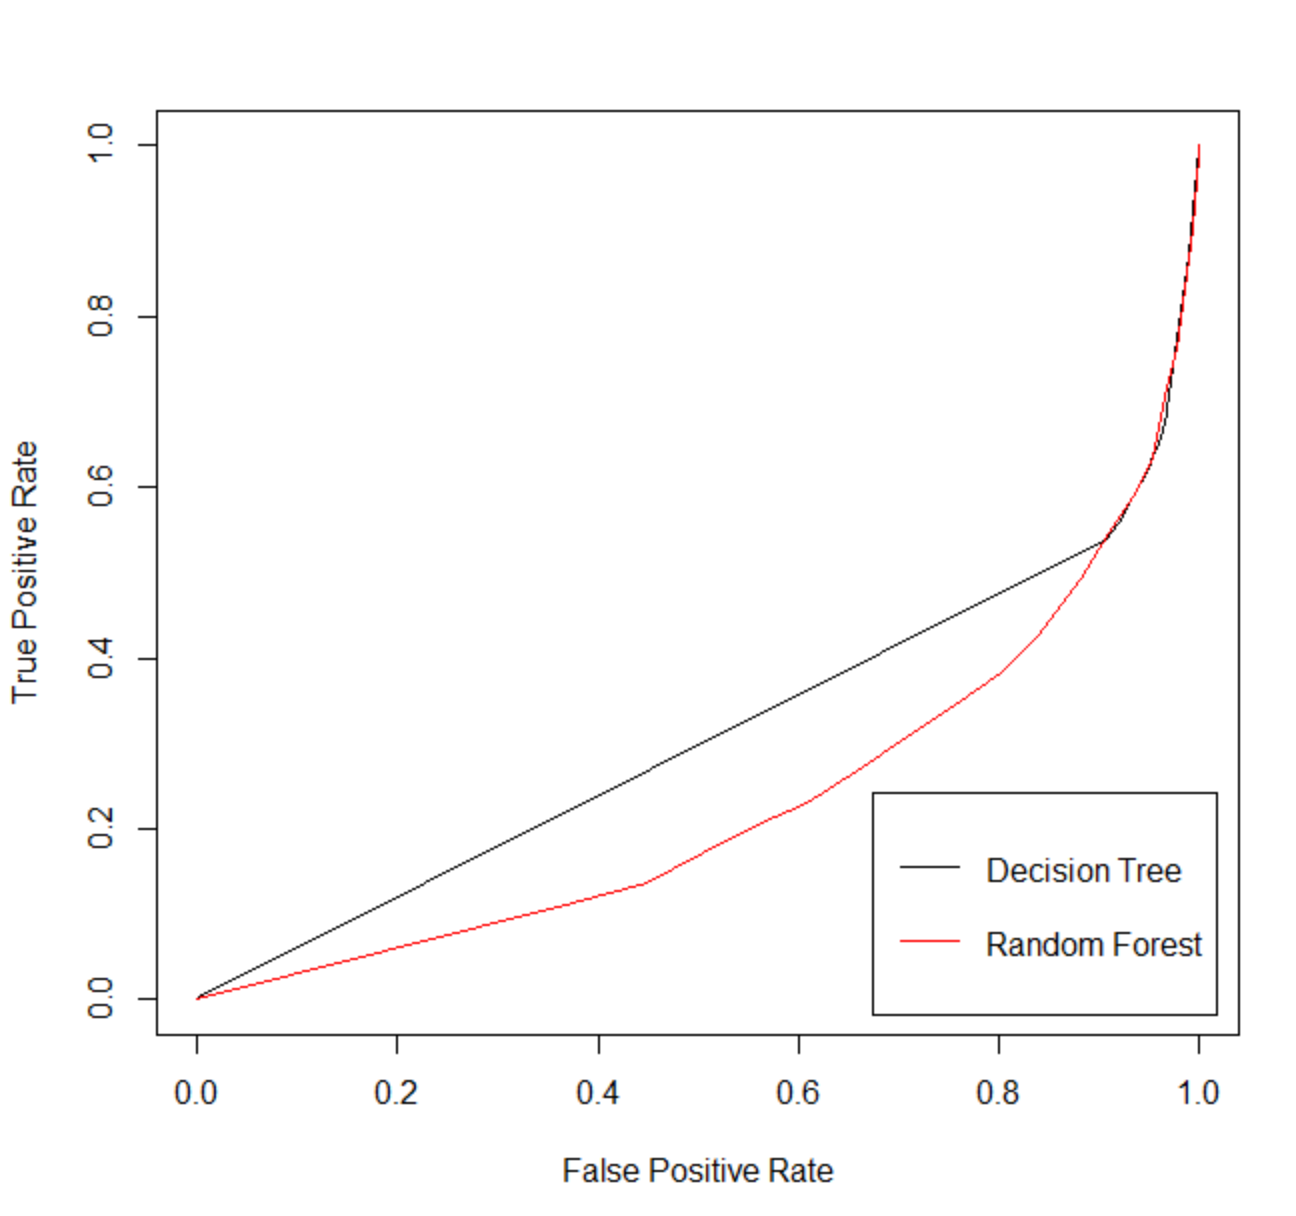

# Best model
It is not apparent which model between decision tree and random forest to select for our case. Continuing by doing hyper parameter tuning could result in one of them giving results that is clearly better than the other.

In [139]:
import org.apache.spark.ml.classification.GBTClassifier

val gb = new GBTClassifier()
    .setLabelCol("label")
    .setFeaturesCol("features")
    .fit(trainSet)

evaluatePredictions(gb.transform(testSet))

// This model also seems to give a similar result to the other two

F1 = 0.7975945912374285, Accuracy = 0.8193913188092466
AUC = 0.22478310001184504, AUPR = 0.1412688536701211
ROC curve:
0.0, 0.0
0.0663517285806313, 0.011061946902654867
0.12282585355379, 0.025811209439528023
0.18617135494953832, 0.03687315634218289
0.24844320377925702, 0.05752212389380531
0.31092978312218167, 0.07669616519174041
0.36890702168778183, 0.10250737463126844
0.42559587717414643, 0.1275811209439528
0.4820700021473051, 0.1592920353982301
0.5484217307279364, 0.19837758112094395
0.605325316727507, 0.23820058997050148
0.6663087824779901, 0.2728613569321534
0.7206356023190895, 0.30678466076696165
0.7676615847111875, 0.3414454277286136
0.8140433755636676, 0.39306784660766964
0.8595662443633241, 0.45132743362831856
0.906377496242216, 0.5339233038348082
0.9420227614343998, 0.6172566371681416
0.9703671891775821, 0.7094395280235988
0.9869014386944385, 0.8488200589970502
0.999785269486794, 0.9911504424778761
1.0, 1.0
1.0, 1.0


gb = GBTClassificationModel (uid=gbtc_8d7408089d74) with 20 trees


GBTClassificationModel (uid=gbtc_8d7408089d74) with 20 trees